QUESTÃO 1

In [48]:
class MedidaPrecisa:
    """
    Classe para representar medidas em centenas de quilômetros
    com precisão de milímetros
    """
    
    MM_POR_KM = 1_000_000  # 1 km = 1.000.000 mm
    KM_POR_CENTENA = 100   # 1 centena de km = 100 km
    
    def __init__(self, centenas_km=0, metros=0, milimetros=0):
        
        self._milimetros_totais = self._para_milimetros(centenas_km, metros, milimetros)
    
    def _para_milimetros(self, centenas_km, metros, milimetros):
        km = centenas_km * self.KM_POR_CENTENA
        mm_km = km * self.MM_POR_KM
        mm_metros = metros * 1000
        return mm_km + mm_metros + milimetros
    
    def _de_milimetros(self):
        mm_totais = self._milimetros_totais
        
        mm_por_centena = self.KM_POR_CENTENA * self.MM_POR_KM
        centenas_km = mm_totais // mm_por_centena
        resto = mm_totais % mm_por_centena
        
        metros = resto // 1000
        milimetros = resto % 1000
        
        return int(centenas_km), int(metros), int(milimetros)
    
    @property
    def centenas_km(self):
        """Retorna a parte em centenas de quilômetros"""
        return self._de_milimetros()[0]
    
    @property
    def metros(self):
        """Retorna a parte em metros"""
        return self._de_milimetros()[1]
    
    @property
    def milimetros(self):
        return self._de_milimetros()[2]
    
    @property
    def metros_totais(self):
        return self._milimetros_totais / 1000
    
    @property
    def quilometros_totais(self):
        return self._milimetros_totais / self.MM_POR_KM
    
    def __add__(self, other):
        if isinstance(other, MedidaPrecisa):
            total_mm = self._milimetros_totais + other._milimetros_totais
            return MedidaPrecisa.from_milimetros(total_mm)
        return NotImplemented
    
    def __sub__(self, other):
        if isinstance(other, MedidaPrecisa):
            total_mm = self._milimetros_totais - other._milimetros_totais
            return MedidaPrecisa.from_milimetros(total_mm)
        return NotImplemented
    
    def __mul__(self, scalar):
        if isinstance(scalar, (int, float)):
            total_mm = self._milimetros_totais * scalar
            return MedidaPrecisa.from_milimetros(total_mm)
        return NotImplemented
    
    def __truediv__(self, scalar):
        if isinstance(scalar, (int, float)):
            total_mm = self._milimetros_totais / scalar
            return MedidaPrecisa.from_milimetros(total_mm)
        return NotImplemented
    
    def __eq__(self, other):
        if isinstance(other, MedidaPrecisa):
            return self._milimetros_totais == other._milimetros_totais
        return False
    
    def __lt__(self, other):
        if isinstance(other, MedidaPrecisa):
            return self._milimetros_totais < other._milimetros_totais
        return NotImplemented
    
    def __repr__(self):
        c_km, m, mm = self._de_milimetros()
        return f"MedidaPrecisa({c_km}cKm, {m}m, {mm}mm)"
    
    def __str__(self):
        c_km, m, mm = self._de_milimetros()
        return f"{c_km}cKm {m}m {mm}mm"
    
    @classmethod
    def from_milimetros(cls, milimetros):
        instancia = cls()
        instancia._milimetros_totais = milimetros
        return instancia
    
    @classmethod
    def from_metros(cls, metros):
        return cls.from_milimetros(metros * 1000)
    
    @classmethod
    def from_quilometros(cls, quilometros):
        return cls.from_milimetros(quilometros * cls.MM_POR_KM)


if __name__ == "__main__":
    print("Exemplos:")
    
    print("\n1. Posição de componentes industriais:")
    
    parafuso1 = MedidaPrecisa(2, 350, 500)  # 2 centenas de km + 350m + 500mm
    parafuso2 = MedidaPrecisa(2, 350, 750)
    
    print(f"Parafuso 1: {parafuso1}")
    print(f"Parafuso 2: {parafuso2}")
    
    distancia = parafuso2 - parafuso1
    print(f"Distância entre parafusos: {distancia}")
    print(f"Distância em metros: {distancia.metros_totais:.3f} m")
    print(f"Distância em km: {distancia.quilometros_totais:.6f} km")
    
    print("\n2. Operações matemáticas:")
    
    medida1 = MedidaPrecisa(1, 500, 250)
    medida2 = MedidaPrecisa(0, 750, 500)
    
    soma = medida1 + medida2
    print(f"{medida1} + {medida2} = {soma}")
    
    multiplicacao = medida1 * 2.5
    print(f"{medida1} × 2.5 = {multiplicacao}")

Exemplos:

1. Posição de componentes industriais:
Parafuso 1: 2cKm 350m 500mm
Parafuso 2: 2cKm 350m 750mm
Distância entre parafusos: 0cKm 0m 250mm
Distância em metros: 0.250 m
Distância em km: 0.000250 km

2. Operações matemáticas:
1cKm 500m 250mm + 0cKm 750m 500mm = 1cKm 1250m 750mm
1cKm 500m 250mm × 2.5 = 2cKm 51250m 625mm


QUESTÃO 2

EXEMPLO: f(x) = x² - 4

1. GRID SEARCH:
   Intervalo encontrado: [-2.1429, -1.4286]

2. BISSEÇÃO:
Bisseção: 20 iterações, erro final: 6.81e-07
   Raiz encontrada: x = -1.99999980
   f(raiz) = -8.17e-07

3. MÉTODO DE NEWTON:
Newton: 5 iterações, erro final: 2.62e-11
   Raiz encontrada: x = 2.00000000
   f(raiz) = 0.00e+00

Análise para e^{-x} - x:
Bisseção: 19 iterações, erro final: 5.20e-07
Newton: 4 iterações, erro final: 2.89e-15
  Bisseção: raiz = 0.56714327
  Newton: raiz = 0.56714329


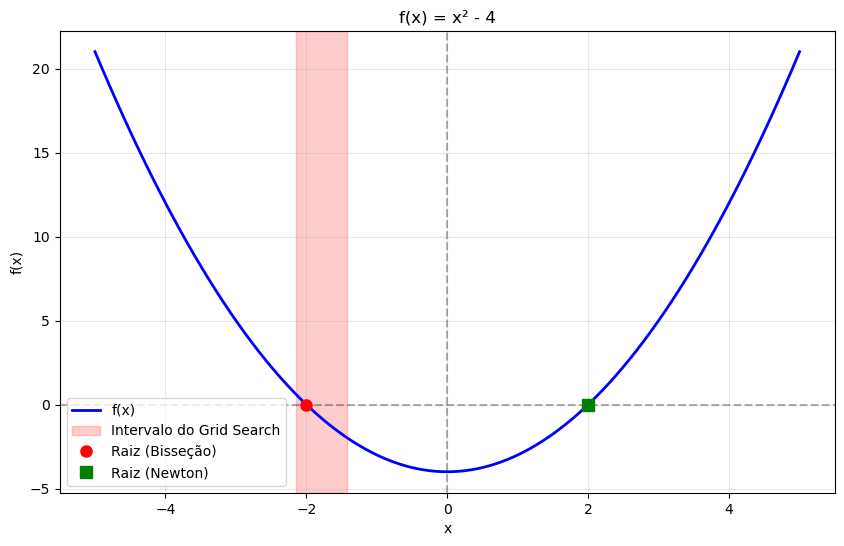

In [50]:
from typing import Any
import numpy as np
import matplotlib.pyplot as plt

class Domain:
    min = None
    max = None

    def __contains__(self, x):
        raise NotImplementedError
    
    def __repr__(self):
        raise NotImplementedError

    def __str__(self):
        return self.__repr__()
    
    def copy(self):
        raise NotImplementedError 

class Interval(Domain):
    def __init__(self, p1, p2):
        self.inff, self.supp = min(p1, p2), max(p1, p2)
    
    @property
    def min(self):
        return self.inff

    @property
    def max(self):
        return self.supp
    
    @property
    def size(self):
        return self.max - self.min
    
    @property
    def haf(self):
        return (self.max + self.min) / 2.0
    
    def __contains__(self, x):
        return np.all(np.logical_and(self.inff <= x, x <= self.supp))

    def __str__(self):
        return f'[{self.inff:2.4f}, {self.supp:2.4f}]' 

    def __repr__(self):
        return f'Interval({self.inff}, {self.supp})'
    
    def copy(self):
        return Interval(self.inff, self.supp)

class RealFunction:
    f = None
    prime = None
    domain = None
    
    def eval_safe(self, x):
        if self.domain is None or x in self.domain:
            return self.f(x)
        else:
            raise Exception("The number is out of the domain")

    def prime_safe(self, x):
        if self.domain is None or x in self.domain:
            return self.prime(x)
        else:
            raise Exception("The number is out of the domain")
        
    def __call__(self, x) -> float:
        return self.eval_safe(x)
    
    def plot(self, title="Gráfico da Função"):
        fig, ax = plt.subplots(figsize=(10, 6))
        X = np.linspace(self.domain.min, self.domain.max, 100)
        Y = self(X)
        ax.plot(X, Y, 'b-', linewidth=2, label='f(x)')
        ax.axhline(y=0, color='k', linestyle='--', alpha=0.3)
        ax.axvline(x=0, color='k', linestyle='--', alpha=0.3)
        ax.grid(True, alpha=0.3)
        ax.set_xlabel('x')
        ax.set_ylabel('f(x)')
        ax.set_title(title)
        ax.legend()
        return fig, ax

def bissect(f: RealFunction, 
            search_space: Interval, 
            erroTol: float = 1e-6, 
            maxItr: int = 1000, 
            eps: float = 1e-8) -> Interval:
    
    count = 0
    ss = search_space.copy()
    
    a, b = ss.min, ss.max
    fa, fb = f(a), f(b)
    
    if abs(fa) < eps:
        return Interval(a, a)
    if abs(fb) < eps:
        return Interval(b, b)
    
    if fa * fb > 0:
        raise Exception("Não há mudança de sinal no intervalo")
    
    historico = [ss.copy()]
    
    while count < maxItr and ss.size > erroTol:
        count += 1
        m = (ss.min + ss.max) / 2.0
        fm = f(m)
        
        if abs(fm) < eps:
            ss = Interval(m, m)
            historico.append(ss.copy())
            break
        elif f(ss.min) * fm < 0:
            ss = Interval(ss.min, m)
        else:
            ss = Interval(m, ss.max)
        
        historico.append(ss.copy())
    
    print(f"Bisseção: {count} iterações, erro final: {ss.size:.2e}")
    return ss, historico

def grid_search(f: RealFunction, domain: Interval = None, grid_freq = 20) -> Interval:
    if domain is not None:
        D = domain.copy()
    else:
        D = f.domain.copy()
    
    L1 = np.linspace(D.min, D.max, grid_freq)
    FL1 = f(L1)
    TI = FL1[:-1] * FL1[1:]
    VI = TI <= 0
    
    if not np.any(VI):
        return None
    
    idx = np.argmax(VI)
    return Interval(L1[idx], L1[idx+1])

def newton_root(f, df, x0, tol=1e-8, max_iter=100):
    
    x = x0
    historico = [x]
    
    for i in range(max_iter):
        fx = f(x)
        dfx = df(x)
        
        if abs(dfx) < 1e-12:
            raise ValueError("Derivada próxima de zero - método pode divergir")
        
        x_novo = x - fx / dfx
        historico.append(x_novo)
        
        if abs(x_novo - x) < tol:
            print(f"Newton: {i+1} iterações, erro final: {abs(x_novo - x):.2e}")
            return x_novo, historico
        
        x = x_novo
    
    raise ValueError("Método não convergiu após {} iterações".format(max_iter))

if __name__ == '__main__':

    print("EXEMPLO: f(x) = x² - 4")
    
    class QuadraticFunction(RealFunction):
        def f(self, x):
            return x**2 - 4
        def prime(self, x):
            return 2*x
        domain = Interval(-5, 5)
    
    f_quad = QuadraticFunction()
    
    fig1, ax1 = f_quad.plot("f(x) = x² - 4")
    
    print("\n1. GRID SEARCH:")
    intervalo_grid = grid_search(f_quad, grid_freq=15)
    print(f"   Intervalo encontrado: {intervalo_grid}")
    if intervalo_grid:
        ax1.axvspan(intervalo_grid.min, intervalo_grid.max, alpha=0.2, color='red', label='Intervalo do Grid Search')
        ax1.legend()
    
    print("\n2. BISSEÇÃO:")
    if intervalo_grid:
        raiz_bissecao, hist_bissecao = bissect(f_quad, intervalo_grid)
        print(f"   Raiz encontrada: x = {raiz_bissecao.haf:.8f}")
        print(f"   f(raiz) = {f_quad(raiz_bissecao.haf):.2e}")
        
        ax1.plot(raiz_bissecao.haf, 0, 'ro', markersize=8, label='Raiz (Bisseção)')
        ax1.legend()
    
    print("\n3. MÉTODO DE NEWTON:")
    try:
        raiz_newton, hist_newton = newton_root(f_quad.f, f_quad.prime, x0=3.0)
        print(f"   Raiz encontrada: x = {raiz_newton:.8f}")
        print(f"   f(raiz) = {f_quad(raiz_newton):.2e}")
        
        ax1.plot(raiz_newton, 0, 'gs', markersize=8, label='Raiz (Newton)')
        ax1.legend()
    except Exception as e:
        print(f"   Erro no método de Newton: {e}")
    

    def analisar_convergencia(f, df, intervalo, x0_newton, nome_funcao):
        print(f"\nAnálise para {nome_funcao}:")
        
        raiz_biss, hist_biss = bissect(f, intervalo)
        erros_biss = [intervalo.size for intervalo in hist_biss]
        
        raiz_newt, hist_newt = newton_root(f.f, df, x0_newton)
        erros_newt = [abs(x - raiz_newt) for x in hist_newt]
        
        print(f"  Bisseção: raiz = {raiz_biss.haf:.8f}")
        print(f"  Newton: raiz = {raiz_newt:.8f}")
    
    analisar_convergencia(f_exp, f_exp.prime, intervalo_grid2, 0.5, "e^{-x} - x")
    
    plt.show()
    

QUESTÃO 3

COMPARAÇÃO DOS MÉTODOS DE INTERPOLAÇÃO

1. VELOCIDADE DE CONSTRUÇÃO:
Vandermonde: 0.000158 segundos
Lagrange:    0.001156 segundos
Razão (Vandermonde/Lagrange): 0.14x

2. VELOCIDADE DE AVALIAÇÃO:
Vandermonde: 0.000458 segundos
Lagrange:    0.000048 segundos
Razão (Vandermonde/Lagrange): 9.50x

3. PRECISÃO:
Diferença máxima entre os métodos: 1.73e-09
Diferença média entre os métodos:  9.20e-10


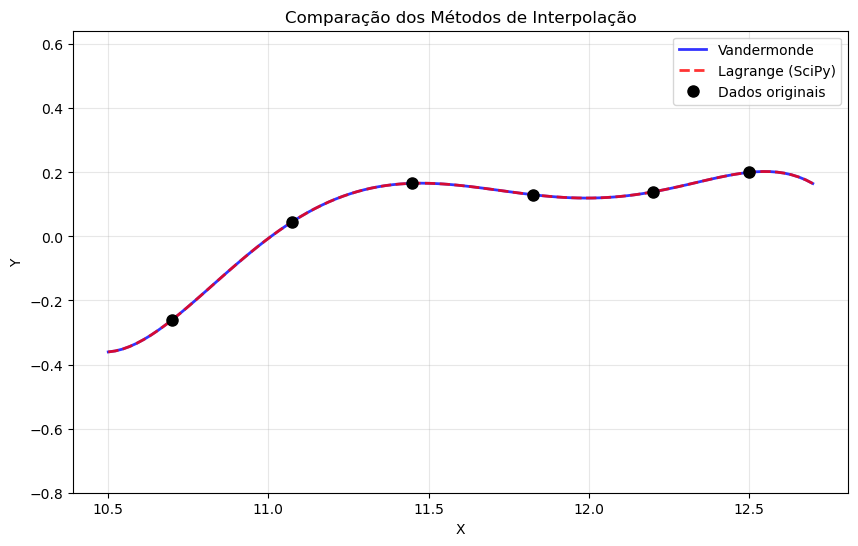

In [22]:
# Python 3
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
import timeit
from time import time

class interpolater:
    def evaluate(self, X):
        raise NotImplementedError

    def __call__(self, X):
        return self.evaluate(X)

class VandermondeMatrix(interpolater):
    def __init__(self, x, y):
        if len(x) != len(y):
            raise RuntimeError(f"Dimensions must be equal len(x) = {len(x)} != len(y) = {len(y)}")
        self.data = [x, y]
        self._degree = len(x) - 1
        self._buildMatrix()
        self._poly = np.linalg.solve(self.matrix, self.data[1])

    def _buildMatrix(self):
        self.matrix = np.ones([self._degree+1, self._degree+1])
        for i, x in enumerate(self.data[0]):
            self.matrix[i, 1:] = np.multiply.accumulate(np.repeat(x, self._degree))
    
    def evaluate(self, X):
        r = 0.0
        for c in self._poly[::-1]:
            r = c + r * X
        return r

#classe de lagrande adicionada
class LagrangeInterpolator(interpolater):
    def __init__(self, x, y):
        if len(x) != len(y):
            raise RuntimeError(f"Dimensions must be equal len(x) = {len(x)} != len(y) = {len(y)}")
        self.data = [x, y]
        self._poly = lagrange(x, y)
    
    def evaluate(self, X):
        return self._poly(X)

def random_sample(intv, N):
    r = np.random.uniform(intv[0], intv[1], N-2)
    r.sort()
    return np.array([intv[0]] + list(r) + [intv[1]])

def error_pol(f, P, intv, n=1000):
    x = random_sample(intv, n)
    vectError = np.abs(f(x) - P(x))
    return np.sum(vectError)/n, np.max(vectError)

#Comparação cos métodos de interpolação
def compare_interpolation_methods(x, y, test_points=1000):

    print("COMPARAÇÃO DOS MÉTODOS DE INTERPOLAÇÃO")
    
    print("\n1. VELOCIDADE DE CONSTRUÇÃO:")
    
    start_time = time()
    vandermonde_poly = VandermondeMatrix(x, y)
    vandermonde_construction_time = time() - start_time
    
    start_time = time()
    lagrange_poly = LagrangeInterpolator(x, y)
    lagrange_construction_time = time() - start_time
    
    print(f"Vandermonde: {vandermonde_construction_time:.6f} segundos")
    print(f"Lagrange:    {lagrange_construction_time:.6f} segundos")
    print(f"Razão (Vandermonde/Lagrange): {vandermonde_construction_time/lagrange_construction_time:.2f}x")
    
    print("\n2. VELOCIDADE DE AVALIAÇÃO:")
    X_test = np.linspace(min(x) - 0.2, max(x) + 0.2, test_points)
    
    start_time = time()
    y_vandermonde = vandermonde_poly(X_test)
    vandermonde_evaluation_time = time() - start_time
    
    start_time = time()
    y_lagrange = lagrange_poly(X_test)
    lagrange_evaluation_time = time() - start_time
    
    print(f"Vandermonde: {vandermonde_evaluation_time:.6f} segundos")
    print(f"Lagrange:    {lagrange_evaluation_time:.6f} segundos")
    print(f"Razão (Vandermonde/Lagrange): {vandermonde_evaluation_time/lagrange_evaluation_time:.2f}x")
    
    print("\n3. PRECISÃO:")
    max_diff = np.max(np.abs(y_vandermonde - y_lagrange))
    mean_diff = np.mean(np.abs(y_vandermonde - y_lagrange))
    print(f"Diferença máxima entre os métodos: {max_diff:.2e}")
    print(f"Diferença média entre os métodos:  {mean_diff:.2e}")
    
    return vandermonde_poly, lagrange_poly


if __name__ == '__main__':
    DataX = [10.7, 11.075, 11.45, 11.825, 12.2, 12.5]
    DataY = [-0.25991903, 0.04625002, 0.16592075, 0.13048074, 0.13902777, 0.2]
    
    vandermonde_poly, lagrange_poly = compare_interpolation_methods(DataX, DataY)
    
    X = np.linspace(min(DataX) - 0.2, max(DataX) + 0.2, 100)
    Y_vandermonde = vandermonde_poly(X)
    Y_lagrange = lagrange_poly(X)
    
    plt.figure(figsize=(10, 6))
    plt.plot(X, Y_vandermonde, 'b-', label='Vandermonde', linewidth=2, alpha=0.8)
    plt.plot(X, Y_lagrange, 'r--', label='Lagrange (SciPy)', linewidth=2, alpha=0.8)
    plt.plot(DataX, DataY, 'ko', markersize=8, label='Dados originais')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Comparação dos Métodos de Interpolação')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.axis('equal')
    plt.show()

    

QUESTÃO 4

Respostas para a alternativa a): 

Raízes:

Método da Bissecção - Linear: 920.00 m
Método da Bissecção - Polinomial: 917.18 m
Método de Newton - Linear: 920.00 m
Método de Newton - Polinomial: 917.18 m

Respostas para a alternativa b): 

Interpolações: 

Linear por partes : 4.00°C
Polinomial: 4.13°C



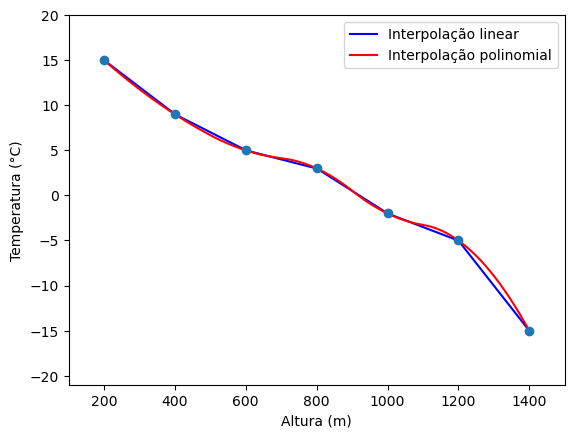

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import root_scalar

class interpolater:
    def evaluate(self, X):
        raise NotImplementedError

    def __call__(self, X):
        return self.evaluate(X)

class Linear(interpolater):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.interpolator = interp1d(x, y, kind='linear', fill_value="interpolate")

    def evaluate(self, X):
        return self.interpolator(X)
    
class polinomial(interpolater):
    def __init__(self, x, y, order=2):
        self.x = x
        self.y = y
        self.interpolator = interp1d(x, y, kind=order, fill_value="interpolate")

    def evaluate(self, X):
        return self.interpolator(X)
    
class bissecao():
    def __init__(self, f, a, b, tol=1e-6, max_iter=100):
        self.f = f
        self.a = a
        self.b = b
        self.tol = tol
        self.max_iter = max_iter

    def find_root(self):
        a = self.a
        b = self.b
        f = self.f
        tol = self.tol
        max_iter = self.max_iter

        if f(a) * f(b) >= 0:
            raise ValueError("A função deve ter sinais opostos em a e b")
        
        iter_count = 0
        while (b - a) / 2 > tol and iter_count < max_iter:
            c = (a + b) / 2
            if abs(f(c)) < tol:
                return c, iter_count
            elif f(a) * f(c) < 0:
                b = c
            else:
                a = c
            iter_count += 1
        
        return (a + b) / 2, iter_count

class newton():
    def __init__(self, f, df, x0, tol=1e-6, max_iter=100):
        self.f = f
        self.df = df
        self.x0 = x0
        self.tol = tol
        self.max_iter = max_iter
    
    def find_root(self):
        x = self.x0
        f = self.f
        df = self.df
        tol = self.tol
        max_iter = self.max_iter

        iter_count = 0
        
        for i in range(max_iter):
            fx = f(x)
            if abs(fx) < tol:
                return x, iter_count + 1
            
            dfx = df(x)
            if dfx == 0:
                raise ValueError("Derivada zero. O método de Newton falhou.")
            
            x_new = x - fx / dfx
            if abs(x_new - x) < tol:
                return x_new, iter_count + 1
            
            x = x_new
            iter_count += 1
        
        return x, iter_count

if __name__ == "__main__":
    import matplotlib.pyplot as plt

    DataX = [200 , 400 , 600 , 800 , 1000 , 1200, 1400]
    DataY = [15  , 9   , 5   , 3   , -2   , -5  , -15]

    linear = Linear(DataX, DataY)
    p = polinomial(DataX, DataY)

    X = np.linspace(min(DataX), max(DataX), 1000000)
    Y = linear(X)
    Z = p(X)
    

    print("Respostas para a alternativa a): \n")

    print("Raízes:\n")


    bisseccao_linear = bissecao(linear, 900, 1000)
    raiz_bisseccao_linear, iter_bisseccao_linear = bisseccao_linear.find_root()
    print(f"Método da Bissecção - Linear: {raiz_bisseccao_linear:.2f} m")
    
    bisseccao_polinomial = bissecao(p, 900, 1000)
    raiz_bisseccao_polinomial, iter_bisseccao_polinomial = bisseccao_polinomial.find_root()
    print(f"Método da Bissecção - Polinomial: {raiz_bisseccao_polinomial:.2f} m")

    newton_linear = newton(linear, lambda x: (linear(x + 1e-6) - linear(x - 1e-6)) / (2e-6), 900)
    raiz_newton_linear, iter_newton_linear = newton_linear.find_root()
    print(f"Método de Newton - Linear: {raiz_newton_linear:.2f} m")

    newton_polinomial = newton(p, lambda x: (p(x + 1e-6) - p(x - 1e-6)) / (2e-6), 900) 
    raiz_newton_polinomial, iter_newton_polinomial = newton_polinomial.find_root()
    print(f"Método de Newton - Polinomial: {raiz_newton_polinomial:.2f} m\n")

    print("Respostas para a alternativa b): \n")

    print("Interpolações: \n")
    
    print(f"Linear por partes : {linear(700):.2f}°C")
    print(f"Polinomial: {p(700):.2f}°C\n")    


    _, ax = plt.subplots(1)
    ax.plot(X,Y, color ='blue')
    ax.plot(X,Z, color ='red')

    ax.legend(['Interpolação linear', 'Interpolação polinomial']) 

    ax.set_xlim(min(DataX)-100, max(DataX)+100)
    ax.set_ylim(min(DataY)-6, max(DataY)+5)

    plt.xlabel('Altura (m)')
    plt.ylabel('Temperatura (°C)')

    ax.plot(DataX, DataY, 'o')
    plt.show()

Concordâncias: Ambos os métodos (linear e polinomial) mostram a mesma tendência decrescente da temperatura com o aumento da altitude; tanto a interpolação linear quanto a polinomial indicam que a temperatura atinge 0°C entre 900-1000m, o que é consistente com os dados (3°C em 800m e -2°C em 1000m); e ambas as interpolações capturam corretamente que a temperatura diminui monotonicamente com a altitude.

Discordâncias: valor diferente devido ao ajuste da curva polinomial; pequenas diferenças na altura e temperatura exatas. Isso pode ocorrer porque a linear assume variação constante entre pontos e a polinomial ajusta uma curva suave, podendo "ultrapassar" os pontos; a interpolação polinomial é mais sensível a flutuações nos dados; a linear é mais "robusta" mas menos suave.